In [1]:
import numpy as np
from dataset.mnist import load_mnist
from common.LayerNet import TwoLayerNet
import matplotlib.pyplot as plt

## get the mnist data

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

## define the parameters

Both `iters_num` and `batch_size` are set to higher if you are going to be in production or in deployment.

In [3]:
iters_num = 200
train_size = x_train.shape[0]
batch_size = 10
learning_rate = 1e-2

## create a neural network

In [4]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

## start training

The following is the example procedure to update the parameters based on gradient. Here we use the training data to calculate the loss to see the training result. 

In [5]:
training_loss = []

for i in range(iters_num):
    
    if i % 100 == 0: print("Iter " + str(i))
    
    # get the batch data
    batch_index = np.random.choice(train_size, batch_size)
    batch_data = x_train[batch_index]
    batch_label = t_train[batch_index]
    
    # calculate the gradient
    grad = network.numerical_gradient(batch_data, batch_label)
    
    # update the parameters based on the gradient
    for key in ['W1','b1','W2','b2']:
        network.params[key] = network.params[key] - learning_rate * grad[key]
        
    # record the loss
    loss = network.loss(batch_data, batch_label)
    training_loss.append(loss)

Iter 0
Iter 100


In [6]:
print(training_loss[1:10])

[7.486291941723017, 6.215989476156598, 7.679488417116801, 6.1242845113409174, 7.642892420809156, 5.12368903978066, 6.546089680835513, 7.427562720746077, 5.985813732866532]


### show the training result

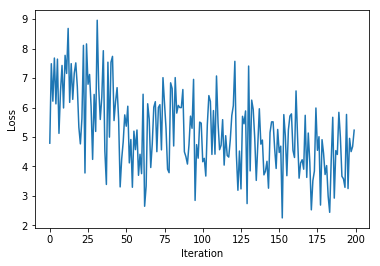

In [7]:
plt.plot(training_loss)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

## testing data as the standard

However, the machine learning model is designed to be generic. Good training result does not stand for the good generic ability.

In [8]:
train_loss = []
train_acc = []
test_acc = []
iter_per_epoch = max(x_train.shape[0] / batch_size, 1)

ideally, 1 epoch stands for go through all data once 

**here, we minify the number in order to shorten the execution time peroid**

In [9]:
iter_per_epoch = min(iter_per_epoch, 50)
print(iter_per_epoch)

50


In [10]:
for i in range(iters_num):
    
    if i % batch_size == 0: print("Iter: " + str(i))
    
    # get the batch data
    batch_index = np.random.choice(train_size, batch_size)
    batch_data = x_train[batch_index]
    batch_label = t_train[batch_index]
    
    # calculate the gradient
    grad = network.numerical_gradient(batch_data, batch_label)
    
    # update the parameternetwork 
    for key in ['W1','b1','W2','b2']:
        network.params[key] -= learning_rate * grad[key]
        
    # record the training loss
    loss = network.loss(batch_data, batch_label)
    train_loss.append(loss)
    
    # n (epoch) = (train_data / batch_size)
    if i % iter_per_epoch == 0:
        train_acc_res = network.accuracy(x_train, t_train)
        test_acc_res = network.accuracy(x_test, t_test)
        
        train_acc.append(train_acc_res)
        test_acc.append(test_acc_res)
        
        print("Train Acc " + str(train_acc_res) + " Test Acc " + str(test_acc_res))

Iter: 0
Train Acc 0.1522 Test Acc 0.1572
Iter: 10
Iter: 20
Iter: 30
Iter: 40
Iter: 50
Train Acc 0.16756666666666667 Test Acc 0.1715
Iter: 60
Iter: 70
Iter: 80
Iter: 90
Iter: 100
Train Acc 0.18995 Test Acc 0.1964
Iter: 110
Iter: 120
Iter: 130
Iter: 140
Iter: 150
Train Acc 0.20065 Test Acc 0.2091
Iter: 160
Iter: 170
Iter: 180
Iter: 190


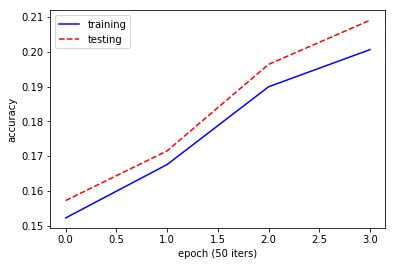

In [11]:
fig = plt.figure()
plt.plot(range(len(train_acc)), train_acc, linestyle = '-', label = 'training', color = 'blue')
plt.plot(range(len(test_acc)), test_acc, linestyle = '--', label = 'testing', color = 'red')
plt.xlabel("epoch (50 iters)")
plt.ylabel("accuracy")
plt.legend()
plt.show()